#Train

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Đường dẫn đến file zip trên Google Drive
train_path = '/content/drive/MyDrive/PhanTichDLChuyenBiet/Data/train.zip'
val_path = '/content/drive/MyDrive/PhanTichDLChuyenBiet/Data/validation.zip'

# Đường dẫn đến thư mục tạm thời để giải nén dữ liệu
temp_train_path = '/content/temp_train_folder'
temp_val_path = '/content/temp_validation_folder'

# Giải nén file zip vào thư mục tạm thời
!unzip "$train_path" -d "$temp_train_path"
!unzip "$val_path" -d "$temp_val_path"

# # Kiểm tra nội dung của thư mục giải nén
# !ls "$temp_train_path"
# !ls "$temp_val_path"


Streaming output truncated to the last 5000 lines.
  inflating: /content/temp_train_folder/fake/frame_1_542.jpg  
  inflating: /content/temp_train_folder/fake/frame_1_544.jpg  
  inflating: /content/temp_train_folder/fake/frame_1_545.jpg  
  inflating: /content/temp_train_folder/fake/frame_1_546.jpg  
  inflating: /content/temp_train_folder/fake/frame_1_547.jpg  
  inflating: /content/temp_train_folder/fake/frame_1_548.jpg  
  inflating: /content/temp_train_folder/fake/frame_1_549.jpg  
  inflating: /content/temp_train_folder/fake/frame_1_550.jpg  
  inflating: /content/temp_train_folder/fake/frame_1_551.jpg  
  inflating: /content/temp_train_folder/fake/frame_1_552.jpg  
  inflating: /content/temp_train_folder/fake/frame_1_554.jpg  
  inflating: /content/temp_train_folder/fake/frame_1_555.jpg  
  inflating: /content/temp_train_folder/fake/frame_1_557.jpg  
  inflating: /content/temp_train_folder/fake/frame_1_558.jpg  
  inflating: /content/temp_train_folder/fake/frame_1_559.jpg  
  in

In [ ]:
!git clone https://github.com/microsoft/unilm.git
!pip install timm==0.4.12
!pip install tensorboardX
!pip install -U deepspeed
!pip install ipyplot

Cloning into 'unilm'...
remote: Enumerating objects: 9790, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 9790 (delta 33), reused 45 (delta 18), pack-reused 9711
Receiving objects: 100% (9790/9790), 55.54 MiB | 29.96 MiB/s, done.
Resolving deltas: 100% (4584/4584), done.
Updating files: 100% (6555/6555), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.0/377.0 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 8.0 MB/s eta 0:00:00
  Created wheel for deepspeed: filename=deepspeed-0.13.2-py3-none-any.whl size=1360175 sha256=

In [ ]:
# %%bash
# Fix lỗi torch._six cho version torch > 1.7
!sed -i 's/from torch._six import inf/from torch import inf/g' /content/unilm/beit2/utils.py

In [ ]:
import os
import torch

%cd /content/unilm/beit2

OUTPUT_DIR = '/content/ckpts/'
# Kiểm tra xem thư mục đã tồn tại chưa
if not os.path.exists(OUTPUT_DIR):
    # Nếu chưa tồn tại, tạo thư mục mới
    os.makedirs(OUTPUT_DIR)

DATA_TRAIN_PATH = temp_train_path
DATA_VAL_PATH = temp_val_path
NUM_CLASSES = 2
EPOCHS = 2
CHECKPOINT = '/content/drive/MyDrive/PhanTichDLChuyenBiet/beitv2_base_patch16_224_pt1k_ft21k.pth'

/content/unilm/beit2


In [1]:
!torchrun --nproc_per_node=1 run_class_finetuning.py \
    --model beit_base_patch16_224 \
    --data_path $DATA_TRAIN_PATH --eval_data_path $DATA_VAL_PATH \
    --nb_classes $NUM_CLASSES --data_set image_folder \
    --finetune $CHECKPOINT \
    --output_dir $OUTPUT_DIR --batch_size 64 --lr 2e-3 --update_freq 2 \
    --warmup_epochs 1 --epochs $EPOCHS --layer_decay 0.75 --drop_path 0.2 \
    --weight_decay 0.05 --enable_deepspeed --layer_scale_init_value 1e-5 --clip_grad 1.0 > out.log

/usr/bin/python3: can't open file '/content/run_class_finetuning.py': [Errno 2] No such file or directory
W0723 11:59:38.646000 135452131438592 torch/distributed/elastic/agent/server/api.py:741] Received Signals.SIGINT death signal, shutting down workers
Traceback (most recent call last):
  File "/usr/local/bin/torchrun", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/torch/distributed/elastic/multiprocessing/errors/__init__.py", line 347, in wrapper
    return f(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/torch/distributed/run.py", line 879, in main
    run(args)
  File "/usr/local/lib/python3.10/dist-packages/torch/distributed/run.py", line 870, in run
    elastic_launch(
  File "/usr/local/lib/python3.10/dist-packages/torch/distributed/launcher/api.py", line 132, in __call__
    return launch_agent(self._config, self._entrypoint, list(args))
  File "/usr/local/lib/python3.10/dist-packages/torch/distributed/launcher/api.p

#Load mô hình và đánh giá

In [ ]:
import os

def checkpoint_exists(checkpoint_path):
    return os.path.exists(checkpoint_path)

# Đường dẫn tới checkpoint cần kiểm tra
checkpoint_path = '/content/ckpts/checkpoint-best/mp_rank_00_model_states.pt'

# Kiểm tra xem checkpoint có tồn tại không
if checkpoint_exists(checkpoint_path):
    print(f"Checkpoint '{checkpoint_path}' tồn tại.")
else:
    print(f"Checkpoint '{checkpoint_path}' không tồn tại.")

Checkpoint '/content/ckpts/checkpoint-best/mp_rank_00_model_states.pt' tồn tại.


In [ ]:
from argparse import Namespace
args = Namespace()

args.model = 'beit_base_patch16_224'
args.input_size = 224
args.nb_classes = 2
args.finetune = '/content/ckpts/checkpoint-best/mp_rank_00_model_states.pt'

In [ ]:
%cd /content/unilm/beit2
import torch
from timm.models import create_model
from collections import OrderedDict
import utils
from scipy import interpolate
import numpy as np

import modeling_finetune



model = create_model(
    args.model,
    pretrained=False,
    num_classes=args.nb_classes,
    drop_rate=0,
    drop_path_rate=0,
    attn_drop_rate=0,
    drop_block_rate=None,
    use_mean_pooling=True,
    init_scale=0,
    use_rel_pos_bias=True,
    use_abs_pos_emb=False,
    init_values=0.1,
    qkv_bias=True,
)


patch_size = model.patch_embed.patch_size
print("Patch size = %s" % str(patch_size))
args.window_size = (args.input_size // patch_size[0], args.input_size // patch_size[1])
args.patch_size = patch_size

if args.finetune:
    if args.finetune.startswith('https'):
        checkpoint = torch.hub.load_state_dict_from_url(
            args.finetune, map_location='cpu', check_hash=True)
    else:
        checkpoint = torch.load(args.finetune, map_location='cpu')

    print("Load ckpt from %s" % args.finetune)
    checkpoint_model = None
    for model_key in "model|module".split('|'):
        if model_key in checkpoint:
            checkpoint_model = checkpoint[model_key]
            print("Load state_dict by model_key = %s" % model_key)
            break
    if checkpoint_model is None:
        checkpoint_model = checkpoint
    if (checkpoint_model is not None) and ("" != ''):
        all_keys = list(checkpoint_model.keys())
        new_dict = OrderedDict()
        for key in all_keys:
            if key.startswith('encoder.'):
                new_dict[key[8:]] = checkpoint_model[key]
            else:
                pass
        checkpoint_model = new_dict

    state_dict = model.state_dict()
    for k in ['head.weight', 'head.bias']:
        if k in checkpoint_model and checkpoint_model[k].shape != state_dict[k].shape:
            if args.robust_test == 'imagenet_r':
                mask = torch.tensor(imagenet_a_r_indices.imagenet_r_mask)
                checkpoint_model[k] = checkpoint_model[k][mask]
            elif args.robust_test == 'imagenet_a':
                mask = torch.tensor(imagenet_a_r_indices.imagenet_a_mask)
                checkpoint_model[k] = checkpoint_model[k][mask]
            else:
                print(f"Removing key {k} from pretrained checkpoint")
                del checkpoint_model[k]


    if getattr(model, 'use_rel_pos_bias', False) and "rel_pos_bias.relative_position_bias_table" in checkpoint_model:
        print("Expand the shared relative position embedding to each transformer block. ")
        num_layers = model.get_num_layers()
        rel_pos_bias = checkpoint_model["rel_pos_bias.relative_position_bias_table"]
        for i in range(num_layers):
            checkpoint_model["blocks.%d.attn.relative_position_bias_table" % i] = rel_pos_bias.clone()

        checkpoint_model.pop("rel_pos_bias.relative_position_bias_table")

    all_keys = list(checkpoint_model.keys())
    for key in all_keys:
        if "relative_position_index" in key:
            checkpoint_model.pop(key)

        if "relative_position_bias_table" in key:
            rel_pos_bias = checkpoint_model[key]
            src_num_pos, num_attn_heads = rel_pos_bias.size()
            dst_num_pos, _ = model.state_dict()[key].size()
            dst_patch_shape = model.patch_embed.patch_shape
            if dst_patch_shape[0] != dst_patch_shape[1]:
                raise NotImplementedError()
            num_extra_tokens = dst_num_pos - (dst_patch_shape[0] * 2 - 1) * (dst_patch_shape[1] * 2 - 1)
            src_size = int((src_num_pos - num_extra_tokens) ** 0.5)
            dst_size = int((dst_num_pos - num_extra_tokens) ** 0.5)
            if src_size != dst_size:
                print("Position interpolate for %s from %dx%d to %dx%d" % (
                    key, src_size, src_size, dst_size, dst_size))
                extra_tokens = rel_pos_bias[-num_extra_tokens:, :]
                rel_pos_bias = rel_pos_bias[:-num_extra_tokens, :]

                def geometric_progression(a, r, n):
                    return a * (1.0 - r ** n) / (1.0 - r)

                left, right = 1.01, 1.5
                while right - left > 1e-6:
                    q = (left + right) / 2.0
                    gp = geometric_progression(1, q, src_size // 2)
                    if gp > dst_size // 2:
                        right = q
                    else:
                        left = q

                dis = []
                cur = 1
                for i in range(src_size // 2):
                    dis.append(cur)
                    cur += q ** (i + 1)

                r_ids = [-_ for _ in reversed(dis)]

                x = r_ids + [0] + dis
                y = r_ids + [0] + dis

                t = dst_size // 2.0
                dx = np.arange(-t, t + 0.1, 1.0)
                dy = np.arange(-t, t + 0.1, 1.0)

                print("Original positions = %s" % str(x))
                print("Target positions = %s" % str(dx))

                all_rel_pos_bias = []

                for i in range(num_attn_heads):
                    z = rel_pos_bias[:, i].view(src_size, src_size).float().numpy()
                    f = interpolate.interp2d(x, y, z, kind='cubic')
                    all_rel_pos_bias.append(
                        torch.Tensor(f(dx, dy)).contiguous().view(-1, 1).to(rel_pos_bias.device))

                rel_pos_bias = torch.cat(all_rel_pos_bias, dim=-1)

                new_rel_pos_bias = torch.cat((rel_pos_bias, extra_tokens), dim=0)
                checkpoint_model[key] = new_rel_pos_bias
    # interpolate position embedding
    if ('pos_embed' in checkpoint_model) and (model.pos_embed is not None):
        pos_embed_checkpoint = checkpoint_model['pos_embed']
        embedding_size = pos_embed_checkpoint.shape[-1]
        num_patches = model.patch_embed.num_patches
        num_extra_tokens = model.pos_embed.shape[-2] - num_patches
        # height (== width) for the checkpoint position embedding
        orig_size = int((pos_embed_checkpoint.shape[-2] - num_extra_tokens) ** 0.5)
        # height (== width) for the new position embedding
        new_size = int(num_patches ** 0.5)
        # class_token and dist_token are kept unchanged
        if orig_size != new_size:
            print("Position interpolate from %dx%d to %dx%d" % (orig_size, orig_size, new_size, new_size))
            extra_tokens = pos_embed_checkpoint[:, :num_extra_tokens]
            # only the position tokens are interpolated
            pos_tokens = pos_embed_checkpoint[:, num_extra_tokens:]
            pos_tokens = pos_tokens.reshape(-1, orig_size, orig_size, embedding_size).permute(0, 3, 1, 2)
            pos_tokens = torch.nn.functional.interpolate(
                pos_tokens, size=(new_size, new_size), mode='bicubic', align_corners=False)
            pos_tokens = pos_tokens.permute(0, 2, 3, 1).flatten(1, 2)
            new_pos_embed = torch.cat((extra_tokens, pos_tokens), dim=1)
            checkpoint_model['pos_embed'] = new_pos_embed

    utils.load_state_dict(model, checkpoint_model, prefix="")
    # model.load_state_dict(checkpoint_model, strict=False)

model = model.cuda()

/content/unilm/beit2


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Patch size = (16, 16)
Load ckpt from /content/ckpts/checkpoint-best/mp_rank_00_model_states.pt
Load state_dict by model_key = module
Ignored weights of VisionTransformer not initialized from pretrained model: ['blocks.0.attn.relative_position_index', 'blocks.1.attn.relative_position_index', 'blocks.2.attn.relative_position_index', 'blocks.3.attn.relative_position_index', 'blocks.4.attn.relative_position_index', 'blocks.5.attn.relative_position_index', 'blocks.6.attn.relative_position_index', 'blocks.7.attn.relative_position_index', 'blocks.8.attn.relative_position_index', 'blocks.9.attn.relative_position_index', 'blocks.10.attn.relative_position_index', 'blocks.11.attn.relative_position_index']


In [ ]:
from torch import nn
import torch.nn.functional as F

# Wrapup lại model

class InferModel(nn.Module):
    def __init__(self,model_s):
        super().__init__()
        self.model_s = model_s.eval()

    def forward(self, image):
        # Move image tensor to GPU
        image = image.unsqueeze(0).to('cuda')

        with torch.no_grad():
            logits_s = self.model_s(image)
            probs = F.softmax(logits_s, dim=-1)

        return probs[0].cpu().detach().numpy()

infer_model = InferModel(model)

In [ ]:
from torchvision.datasets import ImageFolder
import torch
from torchvision import transforms, datasets
from tqdm import tqdm

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

dataset = datasets.ImageFolder(root=temp_val_path, transform=transform)

In [ ]:
# Chạy dự đoán cho mô hình
gts = []
imgs = []
probs = []
for img, gt in tqdm(dataset):
  prob = infer_model(img)
  probs.append(prob)
  imgs.append(img)
  gts.append(gt)

100%|██████████| 1168/1168 [00:43<00:00, 27.01it/s]


In [ ]:
acc = (np.argmax(probs,axis=1) == gts).mean()
print(f'Accuracy on val dataset: {acc*100:.2f}%' )

Accuracy on val dataset: 93.92%


#Test

Test đối với hình bất kỳ trên tập public_test_2

In [ ]:
test_path = '/content/drive/MyDrive/PhantichDLChuyenBiet/Data/public_test_2.zip'

temp_test_path = '/content/temp_test_folder'

!unzip "$test_path" -d "$temp_test_path"

Archive:  /content/drive/MyDrive/PhantichDLChuyenBiet/Data/public_test_2.zip
  inflating: /content/temp_test_folder/frame_0.jpg  
  inflating: /content/temp_test_folder/frame_0_1.jpg  
  inflating: /content/temp_test_folder/frame_0_10.jpg  
  inflating: /content/temp_test_folder/frame_0_100.jpg  
  inflating: /content/temp_test_folder/frame_0_101.jpg  
  inflating: /content/temp_test_folder/frame_0_102.jpg  
  inflating: /content/temp_test_folder/frame_0_103.jpg  
  inflating: /content/temp_test_folder/frame_0_104.jpg  
  inflating: /content/temp_test_folder/frame_0_105.jpg  
  inflating: /content/temp_test_folder/frame_0_106.jpg  
  inflating: /content/temp_test_folder/frame_0_107.jpg  
  inflating: /content/temp_test_folder/frame_0_108.jpg  
  inflating: /content/temp_test_folder/frame_0_109.jpg  
  inflating: /content/temp_test_folder/frame_0_11.jpg  
  inflating: /content/temp_test_folder/frame_0_110.jpg  
  inflating: /content/temp_test_folder/frame_0_111.jpg  
  inflating: /conte

In [ ]:
import torch
from torch.utils.data import Dataset
from PIL import Image

class FakeImageFolderDataset(Dataset):
    def __init__(self, root, transform=None):
        self.root = root
        self.transform = transform
        self.images = sorted(os.listdir(root))

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = self.images[idx]
        img_path = os.path.join(self.root, img_name)
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        return image

# Tạo đối tượng FakeImageFolderDataset
test_dataset = FakeImageFolderDataset(root=temp_test_path, transform=transform)

In [ ]:
import torch
from torchvision import transforms
from PIL import Image
import random

# Lấy số lượng hình ảnh trong tập test dataset
num_images = len(test_dataset)

# Chọn một chỉ mục ngẫu nhiên từ tập test dataset
random_index = random.randint(0, num_images - 1)

# Lấy đối tượng hình ảnh từ dataset theo chỉ mục ngẫu nhiên
input_image = test_dataset[random_index].unsqueeze(0).to('cuda')

# Sử dụng mô hình để dự đoán
with torch.no_grad():
    model.eval()
    outputs = model(input_image)
    _, predicted = torch.max(outputs, 1)

# In ra kết quả dự đoán
print("Prediction:", "real" if predicted.item() == 1 else "fake")


Prediction: real


Test đối với hình ảnh chỉ định trong thư mục test

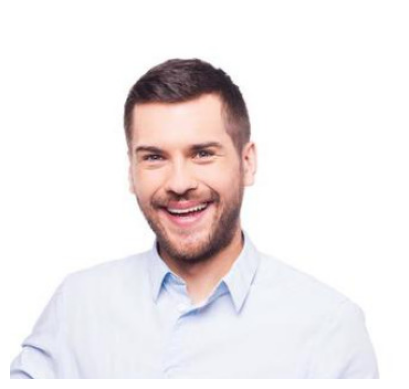

Prediction: real


In [ ]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Chọn một hình ảnh từ test dataset (đường dẫn thực tế cần được cung cấp)
image_path = '/content/drive/MyDrive/PhantichDLChuyenBiet/Data/test/test7.jpg'

img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Tắt trục tọa độ
plt.show()

image = Image.open(image_path).convert('RGB')

# Định nghĩa chuyển đổi hình ảnh
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Áp dụng chuyển đổi lên hình ảnh
input_image = transform(image).unsqueeze(0).to('cuda')

# Sử dụng mô hình để dự đoán
with torch.no_grad():
    model.eval()
    outputs = model(input_image)
    _, predicted = torch.max(outputs, 1)

# In ra kết quả dự đoán
print("Prediction:", "real" if predicted.item() == 1 else "fake")

**Test với streamlit**

In [ ]:
!pip install -q streamlit opencv-python torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.9 MB/s eta 0:00:00


In [ ]:
!pip install torch

In [ ]:
code = """
# Tạo một file Python với tên 'app.py'
import streamlit as st
import torch
import cv2
import collections
from torchvision import transforms
from PIL import Image
# from model_file import InferModel  # Ghi đường dẫn đến file chứa class InferModel

# # Tải pre-trained model và khởi tạo InferModel


from argparse import Namespace
args = Namespace()

args.model = 'beit_base_patch16_224'
args.input_size = 224
args.nb_classes = 2
args.finetune = '/content/ckpts/checkpoint-best/mp_rank_00_model_states.pt'

import os
os.chdir("/content/unilm/beit2")
import torch
from timm.models import create_model
from collections import OrderedDict
import utils
from scipy import interpolate
import numpy as np

import modeling_finetune



model = create_model(
    args.model,
    pretrained=False,
    num_classes=args.nb_classes,
    drop_rate=0,
    drop_path_rate=0,
    attn_drop_rate=0,
    drop_block_rate=None,
    use_mean_pooling=True,
    init_scale=0,
    use_rel_pos_bias=True,
    use_abs_pos_emb=False,
    init_values=0.1,
    qkv_bias=True,
)


patch_size = model.patch_embed.patch_size
print("Patch size = %s" % str(patch_size))
args.window_size = (args.input_size // patch_size[0], args.input_size // patch_size[1])
args.patch_size = patch_size

if args.finetune:
    if args.finetune.startswith('https'):
        checkpoint = torch.hub.load_state_dict_from_url(
            args.finetune, map_location='cpu', check_hash=True)
    else:
        checkpoint = torch.load(args.finetune, map_location='cpu')

    print("Load ckpt from %s" % args.finetune)
    checkpoint_model = None
    for model_key in "model|module".split('|'):
        if model_key in checkpoint:
            checkpoint_model = checkpoint[model_key]
            print("Load state_dict by model_key = %s" % model_key)
            break
    if checkpoint_model is None:
        checkpoint_model = checkpoint
    if (checkpoint_model is not None) and ("" != ''):
        all_keys = list(checkpoint_model.keys())
        new_dict = OrderedDict()
        for key in all_keys:
            if key.startswith('encoder.'):
                new_dict[key[8:]] = checkpoint_model[key]
            else:
                pass
        checkpoint_model = new_dict

    state_dict = model.state_dict()
    for k in ['head.weight', 'head.bias']:
        if k in checkpoint_model and checkpoint_model[k].shape != state_dict[k].shape:
            if args.robust_test == 'imagenet_r':
                mask = torch.tensor(imagenet_a_r_indices.imagenet_r_mask)
                checkpoint_model[k] = checkpoint_model[k][mask]
            elif args.robust_test == 'imagenet_a':
                mask = torch.tensor(imagenet_a_r_indices.imagenet_a_mask)
                checkpoint_model[k] = checkpoint_model[k][mask]
            else:
                print(f"Removing key {k} from pretrained checkpoint")
                del checkpoint_model[k]


    if getattr(model, 'use_rel_pos_bias', False) and "rel_pos_bias.relative_position_bias_table" in checkpoint_model:
        print("Expand the shared relative position embedding to each transformer block. ")
        num_layers = model.get_num_layers()
        rel_pos_bias = checkpoint_model["rel_pos_bias.relative_position_bias_table"]
        for i in range(num_layers):
            checkpoint_model["blocks.%d.attn.relative_position_bias_table" % i] = rel_pos_bias.clone()

        checkpoint_model.pop("rel_pos_bias.relative_position_bias_table")

    all_keys = list(checkpoint_model.keys())
    for key in all_keys:
        if "relative_position_index" in key:
            checkpoint_model.pop(key)

        if "relative_position_bias_table" in key:
            rel_pos_bias = checkpoint_model[key]
            src_num_pos, num_attn_heads = rel_pos_bias.size()
            dst_num_pos, _ = model.state_dict()[key].size()
            dst_patch_shape = model.patch_embed.patch_shape
            if dst_patch_shape[0] != dst_patch_shape[1]:
                raise NotImplementedError()
            num_extra_tokens = dst_num_pos - (dst_patch_shape[0] * 2 - 1) * (dst_patch_shape[1] * 2 - 1)
            src_size = int((src_num_pos - num_extra_tokens) ** 0.5)
            dst_size = int((dst_num_pos - num_extra_tokens) ** 0.5)
            if src_size != dst_size:
                print("Position interpolate for %s from %dx%d to %dx%d" % (
                    key, src_size, src_size, dst_size, dst_size))
                extra_tokens = rel_pos_bias[-num_extra_tokens:, :]
                rel_pos_bias = rel_pos_bias[:-num_extra_tokens, :]

                def geometric_progression(a, r, n):
                    return a * (1.0 - r ** n) / (1.0 - r)

                left, right = 1.01, 1.5
                while right - left > 1e-6:
                    q = (left + right) / 2.0
                    gp = geometric_progression(1, q, src_size // 2)
                    if gp > dst_size // 2:
                        right = q
                    else:
                        left = q

                dis = []
                cur = 1
                for i in range(src_size // 2):
                    dis.append(cur)
                    cur += q ** (i + 1)

                r_ids = [-_ for _ in reversed(dis)]

                x = r_ids + [0] + dis
                y = r_ids + [0] + dis

                t = dst_size // 2.0
                dx = np.arange(-t, t + 0.1, 1.0)
                dy = np.arange(-t, t + 0.1, 1.0)

                print("Original positions = %s" % str(x))
                print("Target positions = %s" % str(dx))

                all_rel_pos_bias = []

                for i in range(num_attn_heads):
                    z = rel_pos_bias[:, i].view(src_size, src_size).float().numpy()
                    f = interpolate.interp2d(x, y, z, kind='cubic')
                    all_rel_pos_bias.append(
                        torch.Tensor(f(dx, dy)).contiguous().view(-1, 1).to(rel_pos_bias.device))

                rel_pos_bias = torch.cat(all_rel_pos_bias, dim=-1)

                new_rel_pos_bias = torch.cat((rel_pos_bias, extra_tokens), dim=0)
                checkpoint_model[key] = new_rel_pos_bias
    # interpolate position embedding
    if ('pos_embed' in checkpoint_model) and (model.pos_embed is not None):
        pos_embed_checkpoint = checkpoint_model['pos_embed']
        embedding_size = pos_embed_checkpoint.shape[-1]
        num_patches = model.patch_embed.num_patches
        num_extra_tokens = model.pos_embed.shape[-2] - num_patches
        # height (== width) for the checkpoint position embedding
        orig_size = int((pos_embed_checkpoint.shape[-2] - num_extra_tokens) ** 0.5)
        # height (== width) for the new position embedding
        new_size = int(num_patches ** 0.5)
        # class_token and dist_token are kept unchanged
        if orig_size != new_size:
            print("Position interpolate from %dx%d to %dx%d" % (orig_size, orig_size, new_size, new_size))
            extra_tokens = pos_embed_checkpoint[:, :num_extra_tokens]
            # only the position tokens are interpolated
            pos_tokens = pos_embed_checkpoint[:, num_extra_tokens:]
            pos_tokens = pos_tokens.reshape(-1, orig_size, orig_size, embedding_size).permute(0, 3, 1, 2)
            pos_tokens = torch.nn.functional.interpolate(
                pos_tokens, size=(new_size, new_size), mode='bicubic', align_corners=False)
            pos_tokens = pos_tokens.permute(0, 2, 3, 1).flatten(1, 2)
            new_pos_embed = torch.cat((extra_tokens, pos_tokens), dim=1)
            checkpoint_model['pos_embed'] = new_pos_embed

    utils.load_state_dict(model, checkpoint_model, prefix="")
    # model.load_state_dict(checkpoint_model, strict=False)

model = model.cuda()

from torch import nn
import torch.nn.functional as F

# Wrapup lại model

class InferModel(nn.Module):
    def __init__(self,model_s):
        super().__init__()
        self.model_s = model_s.eval()

    def forward(self, image):
        # Move image tensor to GPU
        image = image.unsqueeze(0).to('cuda')

        with torch.no_grad():
            logits_s = self.model_s(image)
            probs = F.softmax(logits_s, dim=-1)

        return probs[0].cpu().detach().numpy()

infer_model = InferModel(model)


# Giao diện Streamlit
st.title("Liveness Detection App")

uploaded_file = st.file_uploader("Choose an image...", type="jpg")  # Chấp nhận các định dạng ảnh khác nhau

if uploaded_file is not None:
    # Đọc ảnh từ file tải lên
    image = Image.open(uploaded_file)
    st.image(image, caption="Uploaded Image.", use_column_width=True)

    # Tiền xử lý ảnh
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
    ])
    image = transform(image)


    # Dự đoán với model
    prob = infer_model(image)
    prediction = "Real" if prob[1] > prob[0] else "Fake"
    st.write(f"Prediction: {prediction}")
    st.write(f"Confidence (Real): {prob[1]*100:.2f}%")
    st.write(f"Confidence (Fake): {prob[0]*100:.2f}%")
"""

In [ ]:
# Lưu vào file app.py
with open('app.py', 'w') as file:
    file.write(code)

In [ ]:
! pip install streamlit -q

In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.67.133.20


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501

[..................] \ fetchMetadata: sill resolveWithNewModule localtunnel@2.0


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.67.133.20:8501

npx: installed 22 in 2.833s
your url is: https://chilly-years-slide.loca.lt
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Patch size = (16, 16)
Load ckpt from /content/ckpts/checkpoint-best/mp_rank_00_model_states.pt
Load state_dict by model_key = module
Ignored weights of VisionTransformer not initialized from pretrained model: ['blocks.0.attn.relative_position_index', 'blocks.1.attn.relative_position_index', 'blocks.2.attn.relative_position_index', 'blocks.3.attn.relative_position_index', 'blocks.4.attn.rela